In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./data/multivariateRegressionData.csv")
del data["Date"]
del data["Commodities"]
del data["UnempRate"]

In [3]:
data.head()

,CPI,M0
0,3.421759,5.26888
1,3.304002,5.11356
2,1.897179,4.98100
3,2.096479,4.62763
4,3.168462,4.21477


In [4]:
corrMatrix = data.corr()
print( round(corrMatrix["CPI"][1],3))

-0.298


In [5]:
X = data["M0"]
Y = data["CPI"]

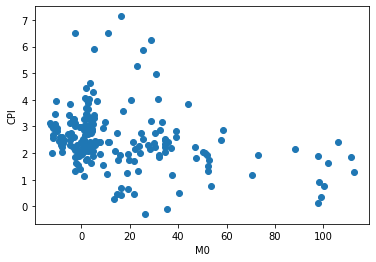

In [6]:
plt.scatter(X,Y)
plt.ylabel("CPI")
plt.xlabel("M0")
plt.show()

In [7]:
X1 = sm.add_constant(X)

reg = sm.OLS(Y, X1).fit()

In [8]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CPI   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     20.10
Date:                Fri, 24 Jun 2022   Prob (F-statistic):           1.22e-05
Time:                        17:45:27   Log-Likelihood:                -307.33
No. Observations:                 208   AIC:                             618.7
Df Residuals:                     206   BIC:                             625.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7196      0.086     31.713      0.000       2.551       2.889
M0            -0.0128      0.003     -4.484      0.000      -0.018      -0.007
==============================================================================
Omnibus:                       63.681   Durbin-Watson:                   0.590
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.850
Skew:                           1.276   Prob(JB):                     5.95e-42
Kurtosis:                       6.923   Cond. No.                         35.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
res = stats.linregress(X,Y)

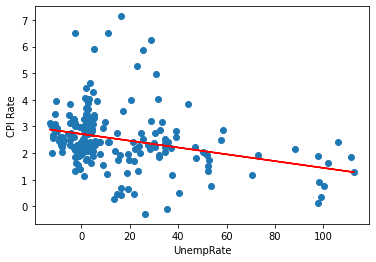

In [10]:
plt.scatter(X,Y)
plt.ylabel("CPI Rate")
plt.xlabel("UnempRate")
plt.plot(X, res.intercept + res.slope*X, 'r', label='fitted line')
plt.show()